# Sources
* [Natural Language Processing in TensorFlow](https://www.coursera.org/learn/natural-language-processing-tensorflow/home/welcome)
* http://projector.tensorflow.org/

In [ ]:
r

# Week 1

In [ ]:
import csv
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tf.__version__

'2.4.0'

In [ ]:
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

# num_words => specifies the maximum number of words to be tokenized, and picks the most common ‘n’ words
# num_words = 100 => tokenize words and sentences, take the top 100 words by volume and just encode those
tokenizer = Tokenizer(num_words = 100)

# take sentences and encode
tokenizer.fit_on_texts(sentences) 

# word encodings => returns a dictionary, key is the word, value is the token
word_index = tokenizer.word_index 

# we builded up a dictionary of all the words to make a corpus
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [ ]:
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences) 
word_index = tokenizer.word_index

# turn sentences into lists of values based on these tokens
# texts_to_sequences => the method used to encode a list of sentences to use those tokens
sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)
# If we don’t use a token for out of vocabulary words, the word isn’t encoded, and is skipped in the sequence.
# [4, 2, 1, 3] => i love my dog, "really" is lost
# [1, 3, 1] => my dog my

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]

Test Sequence =  [[4, 2, 1, 3], [1, 3, 1]]


In [ ]:
# instead of ignoring words, put a special value in when an unseen word is encountered
# <OOV> => out of vocabulary
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences) 
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
print(word_index)
print(sequences)

test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)
# [5, 1, 3, 2, 4] => i <OOV> love my dog
# [2, 4, 1, 2, 1] => my dog <OOV> my <OOV>

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [ ]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

# Make sure that they are all the same length and are understood when fed into a neural network using the pad_sequences method of the tokenizer
padded = pad_sequences(sequences, maxlen=5) 

# pre => default padding value
# post => if you want the padding to be at the end of the sequence
# If we have a number of sequences of different length, and call pad_sequences on them
# they’ll get padded to the length of the longest sequence by adding zeros to the beginning of shorter ones.
padded = pad_sequences(sequences, padding="post", truncating="post", maxlen=5)
#padded = pad_sequences(sequences, padding="post", maxlen=7)
#padded = pad_sequences(sequences)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)

# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]

Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])

--2021-01-13 16:14:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2021-01-13 16:14:47 (107 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]

29657
{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'ha

# Week 1 - Exercise 1, Explore the BBC Archive (Task)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

  
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
# Convert it to a Python list and paste it here
stopwords = #YOUR CODE HERE


In [ ]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # Your Code here


print(len(sentences))
print(sentences[0])

#Expected output
# 2225
# tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want.

In [ ]:
tokenizer = # Your Code Here
tokenizer.fit_on_texts(# Your Code Here)
word_index = # Your Code here
print(# Your Code Here)
# Expected output
# 29714

In [ ]:
sequences = # Your Code Here
padded = # Your Code here
print(padded[0])
print(padded.shape)

# Expected output
# [  96  176 1158 ...    0    0    0]
# (2225, 2442)

In [ ]:
# Your Code Here

print(label_seq)
print(label_word_index)

# Expected Output
# [[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2], [1], [2], [1], [4], [5], [2], [3], [3], [5], [1], [5], [3], [1], [5], [1], [1], [5], [1], [3], [3], [5], [4], [1], [3], [2], [5], [4], [1], [4], [1], [5], [3], [1], [5], [4], [2], [4], [2], [2], [4], [2], [1], [2], [1], [2], [1], [5], [2], [2], [5], [1], [1], [3], [4], [3], [3], [3], [4], [1], [4], [3], [2], [4], [5], [4], [1], [1], [2], [2], [3], [2], [4], [1], [5], [1], [3], [4], [5], [2], [1], [5], [1], [4], [3], [4], [2], [2], [3], [3], [1], [2], [4], [5], [3], [4], [2], [5], [1], [5], [1], [5], [3], [2], [1], [2], [1], [1], [5], [1], [3], [3], [2], [5], [4], [2], [1], [2], [5], [2], [2], [2], [3], [2], [3], [5], [5], [2], [1], [2], [3], [2], [4], [5], [2], [1], [1], [5], [2], [2], [3], [4], [5], [4], [3], [2], [1], [3], [2], [5], [4], [5], [4], [3], [1], [5], [2], [3], [2], [2], [3], [1], [4], [2], [2], [5], [5], [4], [1], [2], [5], [4], [4], [5], [5], [5], [3], [1], [3], [4], [2], [5], [3], [2], [5], [3], [3], [1], [1], [2], [3], [5], [2], [1], [2], [2], [1], [2], [3], [3], [3], [1], [4], [4], [2], [4], [1], [5], [2], [3], [2], [5], [2], [3], [5], [3], [2], [4], [2], [1], [1], [2], [1], [1], [5], [1], [1], [1], [4], [2], [2], [2], [3], [1], [1], [2], [4], [2], [3], [1], [3], [4], [2], [1], [5], [2], [3], [4], [2], [1], [2], [3], [2], [2], [1], [5], [4], [3], [4], [2], [1], [2], [5], [4], [4], [2], [1], [1], [5], [3], [3], [3], [1], [3], [4], [4], [5], [3], [4], [5], [2], [1], [1], [4], [2], [1], [1], [3], [1], [1], [2], [1], [5], [4], [3], [1], [3], [4], [2], [2], [2], [4], [2], [2], [1], [1], [1], [1], [2], [4], [5], [1], [1], [4], [2], [4], [5], [3], [1], [2], [3], [2], [4], [4], [3], [4], [2], [1], [2], [5], [1], [3], [5], [1], [1], [3], [4], [5], [4], [1], [3], [2], [5], [3], [2], [5], [1], [1], [4], [3], [5], [3], [5], [3], [4], [3], [5], [1], [2], [1], [5], [1], [5], [4], [2], [1], [3], [5], [3], [5], [5], [5], [3], [5], [4], [3], [4], [4], [1], [1], [4], [4], [1], [5], [5], [1], [4], [5], [1], [1], [4], [2], [3], [4], [2], [1], [5], [1], [5], [3], [4], [5], [5], [2], [5], [5], [1], [4], [4], [3], [1], [4], [1], [3], [3], [5], [4], [2], [4], [4], [4], [2], [3], [3], [1], [4], [2], [2], [5], [5], [1], [4], [2], [4], [5], [1], [4], [3], [4], [3], [2], [3], [3], [2], [1], [4], [1], [4], [3], [5], [4], [1], [5], [4], [1], [3], [5], [1], [4], [1], [1], [3], [5], [2], [3], [5], [2], [2], [4], [2], [5], [4], [1], [4], [3], [4], [3], [2], [3], [5], [1], [2], [2], [2], [5], [1], [2], [5], [5], [1], [5], [3], [3], [3], [1], [1], [1], [4], [3], [1], [3], [3], [4], [3], [1], [2], [5], [1], [2], [2], [4], [2], [5], [5], [5], [2], [5], [5], [3], [4], [2], [1], [4], [1], [1], [3], [2], [1], [4], [2], [1], [4], [1], [1], [5], [1], [2], [1], [2], [4], [3], [4], [2], [1], [1], [2], [2], [2], [2], [3], [1], [2], [4], [2], [1], [3], [2], [4], [2], [1], [2], [3], [5], [1], [2], [3], [2], [5], [2], [2], [2], [1], [3], [5], [1], [3], [1], [3], [3], [2], [2], [1], [4], [5], [1], [5], [2], [2], [2], [4], [1], [4], [3], [4], [4], [4], [1], [4], [4], [5], [5], [4], [1], [5], [4], [1], [1], [2], [5], [4], [2], [1], [2], [3], [2], [5], [4], [2], [3], [2], [4], [1], [2], [5], [2], [3], [1], [5], [3], [1], [2], [1], [3], [3], [1], [5], [5], [2], [2], [1], [4], [4], [1], [5], [4], [4], [2], [1], [5], [4], [1], [1], [2], [5], [2], [2], [2], [5], [1], [5], [4], [4], [4], [3], [4], [4], [5], [5], [1], [1], [3], [2], [5], [1], [3], [5], [4], [3], [4], [4], [2], [5], [3], [4], [3], [3], [1], [3], [3], [5], [4], [1], [3], [1], [5], [3], [2], [2], [3], [1], [1], [1], [5], [4], [4], [2], [5], [1], [3], [4], [3], [5], [4], [4], [2], [2], [1], [2], [2], [4], [3], [5], [2], [2], [2], [2], [2], [4], [1], [3], [4], [4], [2], [2], [5], [3], [5], [1], [4], [1], [5], [1], [4], [1], [2], [1], [3], [3], [5], [2], [1], [3], [3], [1], [5], [3], [2], [4], [1], [2], [2], [2], [5], [5], [4], [4], [2], [2], [5], [1], [2], [5], [4], [4], [2], [2], [1], [1], [1], [3], [3], [1], [3], [1], [2], [5], [1], [4], [5], [1], [1], [2], [2], [4], [4], [1], [5], [1], [5], [1], [5], [3], [5], [5], [4], [5], [2], [2], [3], [1], [3], [4], [2], [3], [1], [3], [1], [5], [1], [3], [1], [1], [4], [5], [1], [3], [1], [1], [2], [4], [5], [3], [4], [5], [3], [5], [3], [5], [5], [4], [5], [3], [5], [5], [4], [4], [1], [1], [5], [5], [4], [5], [3], [4], [5], [2], [4], [1], [2], [5], [5], [4], [5], [4], [2], [5], [1], [5], [2], [1], [2], [1], [3], [4], [5], [3], [2], [5], [5], [3], [2], [5], [1], [3], [1], [2], [2], [2], [2], [2], [5], [4], [1], [5], [5], [2], [1], [4], [4], [5], [1], [2], [3], [2], [3], [2], [2], [5], [3], [2], [2], [4], [3], [1], [4], [5], [3], [2], [2], [1], [5], [3], [4], [2], [2], [3], [2], [1], [5], [1], [5], [4], [3], [2], [2], [4], [2], [2], [1], [2], [4], [5], [3], [2], [3], [2], [1], [4], [2], [3], [5], [4], [2], [5], [1], [3], [3], [1], [3], [2], [4], [5], [1], [1], [4], [2], [1], [5], [4], [1], [3], [1], [2], [2], [2], [3], [5], [1], [3], [4], [2], [2], [4], [5], [5], [4], [4], [1], [1], [5], [4], [5], [1], [3], [4], [2], [1], [5], [2], [2], [5], [1], [2], [1], [4], [3], [3], [4], [5], [3], [5], [2], [2], [3], [1], [4], [1], [1], [1], [3], [2], [1], [2], [4], [1], [2], [2], [1], [3], [4], [1], [2], [4], [1], [1], [2], [2], [2], [2], [3], [5], [4], [2], [2], [1], [2], [5], [2], [5], [1], [3], [2], [2], [4], [5], [2], [2], [2], [3], [2], [3], [4], [5], [3], [5], [1], [4], [3], [2], [4], [1], [2], [2], [5], [4], [2], [2], [1], [1], [5], [1], [3], [1], [2], [1], [2], [3], [3], [2], [3], [4], [5], [1], [2], [5], [1], [3], [3], [4], [5], [2], [3], [3], [1], [4], [2], [1], [5], [1], [5], [1], [2], [1], [3], [5], [4], [2], [1], [3], [4], [1], [5], [2], [1], [5], [1], [4], [1], [4], [3], [1], [2], [5], [4], [4], [3], [4], [5], [4], [1], [2], [4], [2], [5], [1], [4], [3], [3], [3], [3], [5], [5], [5], [2], [3], [3], [1], [1], [4], [1], [3], [2], [2], [4], [1], [4], [2], [4], [3], [3], [1], [2], [3], [1], [2], [4], [2], [2], [5], [5], [1], [2], [4], [4], [3], [2], [3], [1], [5], [5], [3], [3], [2], [2], [4], [4], [1], [1], [3], [4], [1], [4], [2], [1], [2], [3], [1], [5], [2], [4], [3], [5], [4], [2], [1], [5], [4], [4], [5], [3], [4], [5], [1], [5], [1], [1], [1], [3], [4], [1], [2], [1], [1], [2], [4], [1], [2], [5], [3], [4], [1], [3], [4], [5], [3], [1], [3], [4], [2], [5], [1], [3], [2], [4], [4], [4], [3], [2], [1], [3], [5], [4], [5], [1], [4], [2], [3], [5], [4], [3], [1], [1], [2], [5], [2], [2], [3], [2], [2], [3], [4], [5], [3], [5], [5], [2], [3], [1], [3], [5], [1], [5], [3], [5], [5], [5], [2], [1], [3], [1], [5], [4], [4], [2], [3], [5], [2], [1], [2], [3], [3], [2], [1], [4], [4], [4], [2], [3], [3], [2], [1], [1], [5], [2], [1], [1], [3], [3], [3], [5], [3], [2], [4], [2], [3], [5], [5], [2], [1], [3], [5], [1], [5], [3], [3], [2], [3], [1], [5], [5], [4], [4], [4], [4], [3], [4], [2], [4], [1], [1], [5], [2], [4], [5], [2], [4], [1], [4], [5], [5], [3], [3], [1], [2], [2], [4], [5], [1], [3], [2], [4], [5], [3], [1], [5], [3], [3], [4], [1], [3], [2], [3], [5], [4], [1], [3], [5], [5], [2], [1], [4], [4], [1], [5], [4], [3], [4], [1], [3], [3], [1], [5], [1], [3], [1], [4], [5], [1], [5], [2], [2], [5], [5], [5], [4], [1], [2], [2], [3], [3], [2], [3], [5], [1], [1], [4], [3], [1], [2], [1], [2], [4], [1], [1], [2], [5], [1], [1], [4], [1], [2], [3], [2], [5], [4], [5], [3], [2], [5], [3], [5], [3], [3], [2], [1], [1], [1], [4], [4], [1], [3], [5], [4], [1], [5], [2], [5], [3], [2], [1], [4], [2], [1], [3], [2], [5], [5], [5], [3], [5], [3], [5], [1], [5], [1], [3], [3], [2], [3], [4], [1], [4], [1], [2], [3], [4], [5], [5], [3], [5], [3], [1], [1], [3], [2], [4], [1], [3], [3], [5], [1], [3], [3], [2], [4], [4], [2], [4], [1], [1], [2], [3], [2], [4], [1], [4], [3], [5], [1], [2], [1], [5], [4], [4], [1], [3], [1], [2], [1], [2], [1], [1], [5], [5], [2], [4], [4], [2], [4], [2], [2], [1], [1], [3], [1], [4], [1], [4], [1], [1], [2], [2], [4], [1], [2], [4], [4], [3], [1], [2], [5], [5], [4], [3], [1], [1], [4], [2], [4], [5], [5], [3], [3], [2], [5], [1], [5], [5], [2], [1], [3], [4], [2], [1], [5], [4], [3], [3], [1], [1], [2], [2], [2], [2], [2], [5], [2], [3], [3], [4], [4], [5], [3], [5], [2], [3], [1], [1], [2], [4], [2], [4], [1], [2], [2], [3], [1], [1], [3], [3], [5], [5], [3], [2], [3], [3], [2], [4], [3], [3], [3], [3], [3], [5], [5], [4], [3], [1], [3], [1], [4], [1], [1], [1], [5], [4], [5], [4], [1], [4], [1], [1], [5], [5], [2], [5], [5], [3], [2], [1], [4], [4], [3], [2], [1], [2], [5], [1], [3], [5], [1], [1], [2], [3], [4], [4], [2], [2], [1], [3], [5], [1], [1], [3], [5], [4], [1], [5], [2], [3], [1], [3], [4], [5], [1], [3], [2], [5], [3], [5], [3], [1], [3], [2], [2], [3], [2], [4], [1], [2], [5], [2], [1], [1], [5], [4], [3], [4], [3], [3], [1], [1], [1], [2], [4], [5], [2], [1], [2], [1], [2], [4], [2], [2], [2], [2], [1], [1], [1], [2], [2], [5], [2], [2], [2], [1], [1], [1], [4], [2], [1], [1], [1], [2], [5], [4], [4], [4], [3], [2], [2], [4], [2], [4], [1], [1], [3], [3], [3], [1], [1], [3], [3], [4], [2], [1], [1], [1], [1], [2], [1], [2], [2], [2], [2], [1], [3], [1], [4], [4], [1], [4], [2], [5], [2], [1], [2], [4], [4], [3], [5], [2], [5], [2], [4], [3], [5], [3], [5], [5], [4], [2], [4], [4], [2], [3], [1], [5], [2], [3], [5], [2], [4], [1], [4], [3], [1], [3], [2], [3], [3], [2], [2], [2], [4], [3], [2], [3], [2], [5], [3], [1], [3], [3], [1], [5], [4], [4], [2], [4], [1], [2], [2], [3], [1], [4], [4], [4], [1], [5], [1], [3], [2], [3], [3], [5], [4], [2], [4], [1], [5], [5], [1], [2], [5], [4], [4], [1], [5], [2], [3], [3], [3], [4], [4], [2], [3], [2], [3], [3], [5], [1], [4], [2], [4], [5], [4], [4], [1], [3], [1], [1], [3], [5], [5], [2], [3], [3], [1], [2], [2], [4], [2], [4], [4], [1], [2], [3], [1], [2], [2], [1], [4], [1], [4], [5], [1], [1], [5], [2], [4], [1], [1], [3], [4], [2], [3], [1], [1], [3], [5], [4], [4], [4], [2], [1], [5], [5], [4], [2], [3], [4], [1], [1], [4], [4], [3], [2], [1], [5], [5], [1], [5], [4], [4], [2], [2], [2], [1], [1], [4], [1], [2], [4], [2], [2], [1], [2], [3], [2], [2], [4], [2], [4], [3], [4], [5], [3], [4], [5], [1], [3], [5], [2], [4], [2], [4], [5], [4], [1], [2], [2], [3], [5], [3], [1]]
# {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

# Week 1 - Exercise 1, Explore the BBC Archive (Solution)



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
# Convert it to a Python list and paste it here
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", 
             "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", 
             "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", 
             "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", 
             "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how",
             "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", 
             "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", 
             "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", 
             "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", 
             "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", 
             "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", 
             "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", 
             "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", 
             "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", 
             "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", 
             "yourselves" ]

--2021-01-13 16:14:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.07s   

2021-01-13 16:14:48 (66.8 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [ ]:
sentences = []
labels = []

with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader) # skip the first line
    for row in reader:
       labels.append(row[0])
       sentence = row[1]
       for word in stopwords:
         token = " " + word + " "
         sentence = sentence.replace(token, " ").replace("  ", " ")
       sentences.append(sentence)

print(len(sentences))
print(sentences[0])

#Expected output
# 2225
# tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want.

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [ ]:
sentences[:2]

['tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satel

In [ ]:
labels[:2]

['tech', 'business']

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))
# Expected output
# 29714

29714


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

# Expected output
# [  96  176 1158 ...    0    0    0]
# (2225, 2442)

[  96  176 1158 ...    0    0    0]
(2225, 2442)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)
print(label_seq)
print(label_word_index)
# Expected Output
# [[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2], [1], [2], [1], [4], [5], [2], [3], [3], [5], [1], [5], [3], [1], [5], [1], [1], [5], [1], [3], [3], [5], [4], [1], [3], [2], [5], [4], [1], [4], [1], [5], [3], [1], [5], [4], [2], [4], [2], [2], [4], [2], [1], [2], [1], [2], [1], [5], [2], [2], [5], [1], [1], [3], [4], [3], [3], [3], [4], [1], [4], [3], [2], [4], [5], [4], [1], [1], [2], [2], [3], [2], [4], [1], [5], [1], [3], [4], [5], [2], [1], [5], [1], [4], [3], [4], [2], [2], [3], [3], [1], [2], [4], [5], [3], [4], [2], [5], [1], [5], [1], [5], [3], [2], [1], [2], [1], [1], [5], [1], [3], [3], [2], [5], [4], [2], [1], [2], [5], [2], [2], [2], [3], [2], [3], [5], [5], [2], [1], [2], [3], [2], [4], [5], [2], [1], [1], [5], [2], [2], [3], [4], [5], [4], [3], [2], [1], [3], [2], [5], [4], [5], [4], [3], [1], [5], [2], [3], [2], [2], [3], [1], [4], [2], [2], [5], [5], [4], [1], [2], [5], [4], [4], [5], [5], [5], [3], [1], [3], [4], [2], [5], [3], [2], [5], [3], [3], [1], [1], [2], [3], [5], [2], [1], [2], [2], [1], [2], [3], [3], [3], [1], [4], [4], [2], [4], [1], [5], [2], [3], [2], [5], [2], [3], [5], [3], [2], [4], [2], [1], [1], [2], [1], [1], [5], [1], [1], [1], [4], [2], [2], [2], [3], [1], [1], [2], [4], [2], [3], [1], [3], [4], [2], [1], [5], [2], [3], [4], [2], [1], [2], [3], [2], [2], [1], [5], [4], [3], [4], [2], [1], [2], [5], [4], [4], [2], [1], [1], [5], [3], [3], [3], [1], [3], [4], [4], [5], [3], [4], [5], [2], [1], [1], [4], [2], [1], [1], [3], [1], [1], [2], [1], [5], [4], [3], [1], [3], [4], [2], [2], [2], [4], [2], [2], [1], [1], [1], [1], [2], [4], [5], [1], [1], [4], [2], [4], [5], [3], [1], [2], [3], [2], [4], [4], [3], [4], [2], [1], [2], [5], [1], [3], [5], [1], [1], [3], [4], [5], [4], [1], [3], [2], [5], [3], [2], [5], [1], [1], [4], [3], [5], [3], [5], [3], [4], [3], [5], [1], [2], [1], [5], [1], [5], [4], [2], [1], [3], [5], [3], [5], [5], [5], [3], [5], [4], [3], [4], [4], [1], [1], [4], [4], [1], [5], [5], [1], [4], [5], [1], [1], [4], [2], [3], [4], [2], [1], [5], [1], [5], [3], [4], [5], [5], [2], [5], [5], [1], [4], [4], [3], [1], [4], [1], [3], [3], [5], [4], [2], [4], [4], [4], [2], [3], [3], [1], [4], [2], [2], [5], [5], [1], [4], [2], [4], [5], [1], [4], [3], [4], [3], [2], [3], [3], [2], [1], [4], [1], [4], [3], [5], [4], [1], [5], [4], [1], [3], [5], [1], [4], [1], [1], [3], [5], [2], [3], [5], [2], [2], [4], [2], [5], [4], [1], [4], [3], [4], [3], [2], [3], [5], [1], [2], [2], [2], [5], [1], [2], [5], [5], [1], [5], [3], [3], [3], [1], [1], [1], [4], [3], [1], [3], [3], [4], [3], [1], [2], [5], [1], [2], [2], [4], [2], [5], [5], [5], [2], [5], [5], [3], [4], [2], [1], [4], [1], [1], [3], [2], [1], [4], [2], [1], [4], [1], [1], [5], [1], [2], [1], [2], [4], [3], [4], [2], [1], [1], [2], [2], [2], [2], [3], [1], [2], [4], [2], [1], [3], [2], [4], [2], [1], [2], [3], [5], [1], [2], [3], [2], [5], [2], [2], [2], [1], [3], [5], [1], [3], [1], [3], [3], [2], [2], [1], [4], [5], [1], [5], [2], [2], [2], [4], [1], [4], [3], [4], [4], [4], [1], [4], [4], [5], [5], [4], [1], [5], [4], [1], [1], [2], [5], [4], [2], [1], [2], [3], [2], [5], [4], [2], [3], [2], [4], [1], [2], [5], [2], [3], [1], [5], [3], [1], [2], [1], [3], [3], [1], [5], [5], [2], [2], [1], [4], [4], [1], [5], [4], [4], [2], [1], [5], [4], [1], [1], [2], [5], [2], [2], [2], [5], [1], [5], [4], [4], [4], [3], [4], [4], [5], [5], [1], [1], [3], [2], [5], [1], [3], [5], [4], [3], [4], [4], [2], [5], [3], [4], [3], [3], [1], [3], [3], [5], [4], [1], [3], [1], [5], [3], [2], [2], [3], [1], [1], [1], [5], [4], [4], [2], [5], [1], [3], [4], [3], [5], [4], [4], [2], [2], [1], [2], [2], [4], [3], [5], [2], [2], [2], [2], [2], [4], [1], [3], [4], [4], [2], [2], [5], [3], [5], [1], [4], [1], [5], [1], [4], [1], [2], [1], [3], [3], [5], [2], [1], [3], [3], [1], [5], [3], [2], [4], [1], [2], [2], [2], [5], [5], [4], [4], [2], [2], [5], [1], [2], [5], [4], [4], [2], [2], [1], [1], [1], [3], [3], [1], [3], [1], [2], [5], [1], [4], [5], [1], [1], [2], [2], [4], [4], [1], [5], [1], [5], [1], [5], [3], [5], [5], [4], [5], [2], [2], [3], [1], [3], [4], [2], [3], [1], [3], [1], [5], [1], [3], [1], [1], [4], [5], [1], [3], [1], [1], [2], [4], [5], [3], [4], [5], [3], [5], [3], [5], [5], [4], [5], [3], [5], [5], [4], [4], [1], [1], [5], [5], [4], [5], [3], [4], [5], [2], [4], [1], [2], [5], [5], [4], [5], [4], [2], [5], [1], [5], [2], [1], [2], [1], [3], [4], [5], [3], [2], [5], [5], [3], [2], [5], [1], [3], [1], [2], [2], [2], [2], [2], [5], [4], [1], [5], [5], [2], [1], [4], [4], [5], [1], [2], [3], [2], [3], [2], [2], [5], [3], [2], [2], [4], [3], [1], [4], [5], [3], [2], [2], [1], [5], [3], [4], [2], [2], [3], [2], [1], [5], [1], [5], [4], [3], [2], [2], [4], [2], [2], [1], [2], [4], [5], [3], [2], [3], [2], [1], [4], [2], [3], [5], [4], [2], [5], [1], [3], [3], [1], [3], [2], [4], [5], [1], [1], [4], [2], [1], [5], [4], [1], [3], [1], [2], [2], [2], [3], [5], [1], [3], [4], [2], [2], [4], [5], [5], [4], [4], [1], [1], [5], [4], [5], [1], [3], [4], [2], [1], [5], [2], [2], [5], [1], [2], [1], [4], [3], [3], [4], [5], [3], [5], [2], [2], [3], [1], [4], [1], [1], [1], [3], [2], [1], [2], [4], [1], [2], [2], [1], [3], [4], [1], [2], [4], [1], [1], [2], [2], [2], [2], [3], [5], [4], [2], [2], [1], [2], [5], [2], [5], [1], [3], [2], [2], [4], [5], [2], [2], [2], [3], [2], [3], [4], [5], [3], [5], [1], [4], [3], [2], [4], [1], [2], [2], [5], [4], [2], [2], [1], [1], [5], [1], [3], [1], [2], [1], [2], [3], [3], [2], [3], [4], [5], [1], [2], [5], [1], [3], [3], [4], [5], [2], [3], [3], [1], [4], [2], [1], [5], [1], [5], [1], [2], [1], [3], [5], [4], [2], [1], [3], [4], [1], [5], [2], [1], [5], [1], [4], [1], [4], [3], [1], [2], [5], [4], [4], [3], [4], [5], [4], [1], [2], [4], [2], [5], [1], [4], [3], [3], [3], [3], [5], [5], [5], [2], [3], [3], [1], [1], [4], [1], [3], [2], [2], [4], [1], [4], [2], [4], [3], [3], [1], [2], [3], [1], [2], [4], [2], [2], [5], [5], [1], [2], [4], [4], [3], [2], [3], [1], [5], [5], [3], [3], [2], [2], [4], [4], [1], [1], [3], [4], [1], [4], [2], [1], [2], [3], [1], [5], [2], [4], [3], [5], [4], [2], [1], [5], [4], [4], [5], [3], [4], [5], [1], [5], [1], [1], [1], [3], [4], [1], [2], [1], [1], [2], [4], [1], [2], [5], [3], [4], [1], [3], [4], [5], [3], [1], [3], [4], [2], [5], [1], [3], [2], [4], [4], [4], [3], [2], [1], [3], [5], [4], [5], [1], [4], [2], [3], [5], [4], [3], [1], [1], [2], [5], [2], [2], [3], [2], [2], [3], [4], [5], [3], [5], [5], [2], [3], [1], [3], [5], [1], [5], [3], [5], [5], [5], [2], [1], [3], [1], [5], [4], [4], [2], [3], [5], [2], [1], [2], [3], [3], [2], [1], [4], [4], [4], [2], [3], [3], [2], [1], [1], [5], [2], [1], [1], [3], [3], [3], [5], [3], [2], [4], [2], [3], [5], [5], [2], [1], [3], [5], [1], [5], [3], [3], [2], [3], [1], [5], [5], [4], [4], [4], [4], [3], [4], [2], [4], [1], [1], [5], [2], [4], [5], [2], [4], [1], [4], [5], [5], [3], [3], [1], [2], [2], [4], [5], [1], [3], [2], [4], [5], [3], [1], [5], [3], [3], [4], [1], [3], [2], [3], [5], [4], [1], [3], [5], [5], [2], [1], [4], [4], [1], [5], [4], [3], [4], [1], [3], [3], [1], [5], [1], [3], [1], [4], [5], [1], [5], [2], [2], [5], [5], [5], [4], [1], [2], [2], [3], [3], [2], [3], [5], [1], [1], [4], [3], [1], [2], [1], [2], [4], [1], [1], [2], [5], [1], [1], [4], [1], [2], [3], [2], [5], [4], [5], [3], [2], [5], [3], [5], [3], [3], [2], [1], [1], [1], [4], [4], [1], [3], [5], [4], [1], [5], [2], [5], [3], [2], [1], [4], [2], [1], [3], [2], [5], [5], [5], [3], [5], [3], [5], [1], [5], [1], [3], [3], [2], [3], [4], [1], [4], [1], [2], [3], [4], [5], [5], [3], [5], [3], [1], [1], [3], [2], [4], [1], [3], [3], [5], [1], [3], [3], [2], [4], [4], [2], [4], [1], [1], [2], [3], [2], [4], [1], [4], [3], [5], [1], [2], [1], [5], [4], [4], [1], [3], [1], [2], [1], [2], [1], [1], [5], [5], [2], [4], [4], [2], [4], [2], [2], [1], [1], [3], [1], [4], [1], [4], [1], [1], [2], [2], [4], [1], [2], [4], [4], [3], [1], [2], [5], [5], [4], [3], [1], [1], [4], [2], [4], [5], [5], [3], [3], [2], [5], [1], [5], [5], [2], [1], [3], [4], [2], [1], [5], [4], [3], [3], [1], [1], [2], [2], [2], [2], [2], [5], [2], [3], [3], [4], [4], [5], [3], [5], [2], [3], [1], [1], [2], [4], [2], [4], [1], [2], [2], [3], [1], [1], [3], [3], [5], [5], [3], [2], [3], [3], [2], [4], [3], [3], [3], [3], [3], [5], [5], [4], [3], [1], [3], [1], [4], [1], [1], [1], [5], [4], [5], [4], [1], [4], [1], [1], [5], [5], [2], [5], [5], [3], [2], [1], [4], [4], [3], [2], [1], [2], [5], [1], [3], [5], [1], [1], [2], [3], [4], [4], [2], [2], [1], [3], [5], [1], [1], [3], [5], [4], [1], [5], [2], [3], [1], [3], [4], [5], [1], [3], [2], [5], [3], [5], [3], [1], [3], [2], [2], [3], [2], [4], [1], [2], [5], [2], [1], [1], [5], [4], [3], [4], [3], [3], [1], [1], [1], [2], [4], [5], [2], [1], [2], [1], [2], [4], [2], [2], [2], [2], [1], [1], [1], [2], [2], [5], [2], [2], [2], [1], [1], [1], [4], [2], [1], [1], [1], [2], [5], [4], [4], [4], [3], [2], [2], [4], [2], [4], [1], [1], [3], [3], [3], [1], [1], [3], [3], [4], [2], [1], [1], [1], [1], [2], [1], [2], [2], [2], [2], [1], [3], [1], [4], [4], [1], [4], [2], [5], [2], [1], [2], [4], [4], [3], [5], [2], [5], [2], [4], [3], [5], [3], [5], [5], [4], [2], [4], [4], [2], [3], [1], [5], [2], [3], [5], [2], [4], [1], [4], [3], [1], [3], [2], [3], [3], [2], [2], [2], [4], [3], [2], [3], [2], [5], [3], [1], [3], [3], [1], [5], [4], [4], [2], [4], [1], [2], [2], [3], [1], [4], [4], [4], [1], [5], [1], [3], [2], [3], [3], [5], [4], [2], [4], [1], [5], [5], [1], [2], [5], [4], [4], [1], [5], [2], [3], [3], [3], [4], [4], [2], [3], [2], [3], [3], [5], [1], [4], [2], [4], [5], [4], [4], [1], [3], [1], [1], [3], [5], [5], [2], [3], [3], [1], [2], [2], [4], [2], [4], [4], [1], [2], [3], [1], [2], [2], [1], [4], [1], [4], [5], [1], [1], [5], [2], [4], [1], [1], [3], [4], [2], [3], [1], [1], [3], [5], [4], [4], [4], [2], [1], [5], [5], [4], [2], [3], [4], [1], [1], [4], [4], [3], [2], [1], [5], [5], [1], [5], [4], [4], [2], [2], [2], [1], [1], [4], [1], [2], [4], [2], [2], [1], [2], [3], [2], [2], [4], [2], [4], [3], [4], [5], [3], [4], [5], [1], [3], [5], [2], [4], [2], [4], [5], [4], [1], [2], [2], [3], [5], [3], [1]]
# {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

___

# Week 2 - IMDB Reviews Data Set

In [ ]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXBO0NY/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXBO0NY/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteXBO0NY/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
imdb

{'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [ ]:
train_data, test_data = imdb['train'], imdb['test']
train_data

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [ ]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

print_val = 1

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
# tf.Tensor(1, shape=(), dtype=int64) => positive review
# tf.Tensor(0, shape=(), dtype=int64) => negative review
for s, l in train_data:
  if print_val:
    print(s)
    print(s.numpy())
    print(l)
    print(l.numpy)
    print("---------")
    print_val = 0
    
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# loaded the raw text for the reviews, and tokenized them ourselves
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline

In [ ]:
print(word_index)
print(sequences[3])
print(padded[3])

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'he': 27, 'be': 28, 'one': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'so': 36, 'from': 37, 'like': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, "it's": 43, 'out': 44, 'if': 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'she': 57, 'even': 58, 'my': 59, 'would': 60, 'which': 61, 'only': 62, 'story': 63, 'really': 64, 'see': 65, 'their': 66, 'had': 67, 'can': 68, 'were': 69, 'me': 70, 'well': 71, 'than': 72, 'we': 73, 'much': 74, 'been': 75, 'bad': 76, 'get': 77, 'will': 78, 'do': 79, 'also': 80, 'into': 81, 'people': 82, 'other': 83, 'first': 84, 'great': 85, 'because': 86, 'how': 87, 'him': 88, 'most':

In [ ]:
# To be able to plot it, we need a helper function to reverse our word index.
# key => word
# value => token
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print(reverse_word_index)

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

{1: '<OOV>', 2: 'the', 3: 'and', 4: 'a', 5: 'of', 6: 'to', 7: 'is', 8: 'br', 9: 'in', 10: 'it', 11: 'i', 12: 'this', 13: 'that', 14: 'was', 15: 'as', 16: 'for', 17: 'with', 18: 'movie', 19: 'but', 20: 'film', 21: 'on', 22: 'not', 23: 'you', 24: 'are', 25: 'his', 26: 'have', 27: 'he', 28: 'be', 29: 'one', 30: 'all', 31: 'at', 32: 'by', 33: 'an', 34: 'they', 35: 'who', 36: 'so', 37: 'from', 38: 'like', 39: 'her', 40: 'or', 41: 'just', 42: 'about', 43: "it's", 44: 'out', 45: 'if', 46: 'has', 47: 'some', 48: 'there', 49: 'what', 50: 'good', 51: 'more', 52: 'when', 53: 'very', 54: 'up', 55: 'no', 56: 'time', 57: 'she', 58: 'even', 59: 'my', 60: 'would', 61: 'which', 62: 'only', 63: 'story', 64: 'really', 65: 'see', 66: 'their', 67: 'had', 68: 'can', 69: 'were', 70: 'me', 71: 'well', 72: 'than', 73: 'we', 74: 'much', 75: 'been', 76: 'bad', 77: 'get', 78: 'will', 79: 'do', 80: 'also', 81: 'into', 82: 'people', 83: 'other', 84: 'first', 85: 'great', 86: 'because', 87: 'how', 88: 'him', 89: 'mo

In [ ]:
model = tf.keras.Sequential([
    # Embedding => the key to text sentiment analysis in TensorFlow
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

    # Often in NLP, a different layer type than a flatten is used, and this is a global average pooling 1D. 
    # The reason for this is the size of the output vector being fed into the dense.
    # Alternatively, you can use a [tf.keras.layers.GlobalAveragePooling1D()] instead of [tf.keras.layers.Flatten()].
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 8s 8ms/step - loss: 0.6092 - accuracy: 0.6301 - val_loss: 0.3411 - val_accuracy: 0.8502
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2454 - accuracy: 0.9039 - val_loss: 0.3760 - val_accuracy: 0.8384
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0955 - accuracy: 0.9780 - val_loss: 0.4429 - val_accuracy: 0.8300
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0243 - accuracy: 0.9970 - val_loss: 0.5132 - val_accuracy: 0.8292
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 0.5788 - val_accuracy: 0.8304
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.6278 - val_accuracy: 0.8312
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 9.5197e-04 - accuracy: 1.0000 - val_loss: 0.6721 - val_accuracy: 0.8316
Ep

Giving us accuracy: 1.0000 and the validation: 0.8258. So there's a good chance that we're overfitting.

In [ ]:
e = model.layers[0] # embedding layer
print(e)
weights = e.get_weights()[0]
print(weights.shape)
# shape: (vocab_size, embedding_dim) => 10000 words, 16 dimensions

(10000, 16)


In [ ]:
# write the vectors and their metadata
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n") # metadata
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n") # vectors
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# After downloading the files, to render the results, go to the TensorFlow Embedding Projector on 
# http://projector.tensorflow.org/, press the "Load data" button on the left. You'll see a dialog
# asking you to load data from your computer. Use [vector.tsv] for the first one, and [meta.tsv] for the second.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


___

# Week 2 - Sarcasm Data Set

In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

# Week 2 - Pre-tokenized on Sub-Words Version of the IMDb Data Set
* https://github.com/tensorflow/datasets/blob/master/docs/catalog/imdb_reviews.md

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# subwords8k => Pre-tokenized version of the IMDb data set
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder # if you want to access the sub-words tokenizer, you can do it with this code
print(tokenizer.subwords) # pre-trained sub-words tokenizer

sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2THX2F/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2THX2F/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete2THX2F/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'd

In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    # One thing to take into account though, is the shape of the vectors coming from the tokenizer 
    # through the embedding, and it's not easily flattened. So we'll use [GlobalAveragePooling1D] instead. 
    # Trying to flatten them, will cause a TensorFlow crash.
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)
history

Epoch 1/10
391/391 [==============================] - 13s 31ms/step - loss: 0.6878 - accuracy: 0.5578 - val_loss: 0.6158 - val_accuracy: 0.7393
Epoch 2/10
391/391 [==============================] - 12s 30ms/step - loss: 0.5550 - accuracy: 0.7876 - val_loss: 0.4329 - val_accuracy: 0.8446
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 0.3788 - accuracy: 0.8674 - val_loss: 0.3549 - val_accuracy: 0.8680
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2977 - accuracy: 0.8948 - val_loss: 0.3308 - val_accuracy: 0.8673
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 0.2557 - accuracy: 0.9112 - val_loss: 0.3116 - val_accuracy: 0.8792
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2362 - accuracy: 0.9178 - val_loss: 0.3066 - val_accuracy: 0.8804
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2093 - accuracy: 0.9252 - val_loss: 0.3062 - val_accuracy:

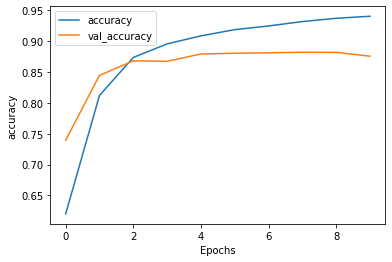

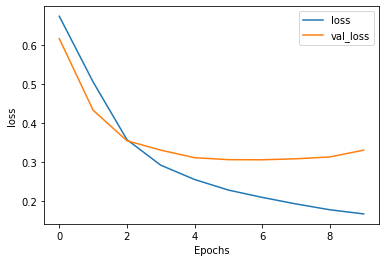

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Losses decreasing in a very small way. Why do you think that might be? The keys in the fact that we're using sub-words and not for-words, sub-word meanings are often nonsensical and it's only when we put them together in sequences that they have meaningful semantics. We're training on things that it's very hard to pull semantics and meaning out of them. Thus, some way from learning from sequences would be a great way forward.

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

___

# Week 2 - Exercise 2, Explore the BBC Archive Exercise (Task)

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

In [ ]:
vocab_size = # YOUR CODE HERE
embedding_dim = # YOUR CODE HERE
max_length = # YOUR CODE HERE
trunc_type = # YOUR CODE HERE
padding_type = # YOUR CODE HERE
oov_tok = # YOUR CODE HERE
training_portion = .8

In [ ]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

In [ ]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # YOUR CODE HERE

    
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

In [ ]:
train_size = # YOUR CODE HERE

train_sentences = # YOUR CODE HERE
train_labels = # YOUR CODE HERE

validation_sentences = # YOUR CODE HERE
validation_labels = # YOUR CODE HERE

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

In [ ]:
tokenizer = # YOUR CODE HERE
tokenizer.fit_on_texts(# YOUR CODE HERE)
word_index = # YOUR CODE HERE

train_sequences = # YOUR CODE HERE
train_padded = # YOUR CODE HERE

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

In [ ]:
validation_sequences = # YOUR CODE HERE
validation_padded = # YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

In [ ]:
label_tokenizer = # YOUR CODE HERE
label_tokenizer.fit_on_texts(# YOUR CODE HERE)

training_label_seq = # YOUR CODE HERE
validation_label_seq = # YOUR CODE HERE

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

In [ ]:
model = tf.keras.Sequential([
# YOUR CODE HERE
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

In [ ]:
num_epochs = 30
history = model.fit(# YOUR CODE HERE)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# Week 2 - Exercise 2, Explore the BBC Archive Exercise (Solution)

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-01-13 16:21:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.04s   

2021-01-13 16:21:38 (115 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [ ]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", 
             "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", 
             "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", 
             "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", 
             "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", 
             "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", 
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", 
             "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", 
             "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", 
             "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", 
             "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", 
             "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", 
             "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
             
print(len(stopwords))
# Expected Output
# 153

153


In [ ]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [ ]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7679 - accuracy: 0.2270 - val_loss: 1.7417 - val_accuracy: 0.2270
Epoch 2/30
56/56 - 0s - loss: 1.7027 - accuracy: 0.2303 - val_loss: 1.6607 - val_accuracy: 0.2270
Epoch 3/30
56/56 - 0s - loss: 1.5905 - accuracy: 0.2438 - val_loss: 1.5276 - val_accuracy: 0.3528
Epoch 4/30
56/56 - 0s - loss: 1.4221 - accuracy: 0.5348 - val_loss: 1.3404 - val_accuracy: 0.6045
Epoch 5/30
56/56 - 0s - loss: 1.2091 - accuracy: 0.6326 - val_loss: 1.1283 - val_accuracy: 0.6292
Epoch 6/30
56/56 - 0s - loss: 1.0061 - accuracy: 0.6888 - val_loss: 0.9624 - val_accuracy: 0.7371
Epoch 7/30
56/56 - 0s - loss: 0.8487 - accuracy: 0.7848 - val_loss: 0.8343 - val_accuracy: 0.7798
Epoch 8/30
56/56 - 0s - loss: 0.7244 - accuracy: 0.8354 - val_loss: 0.7323 - val_accuracy: 0.8112
Epoch 9/30
56/56 - 0s - loss: 0.6225 - accuracy: 0.8584 - val_loss: 0.6468 - val_accuracy: 0.8494
Epoch 10/30
56/56 - 0s - loss: 0.5373 - accuracy: 0.8910 - val_loss: 0.5798 - val_accuracy: 0.8697
Epoch 11/30
56/56 -

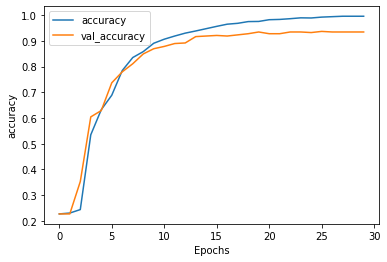

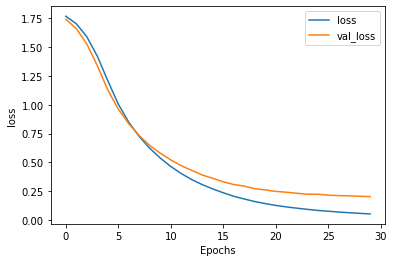

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Week 3 - IMDB Subwords 8K with Single Layer LSTM

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 178s 437ms/step - loss: 0.5974 - accuracy: 0.6535 - val_loss: 0.4511 - val_accuracy: 0.8049
Epoch 2/10
391/391 [==============================] - 169s 432ms/step - loss: 0.4452 - accuracy: 0.7936 - val_loss: 0.8516 - val_accuracy: 0.5014
Epoch 3/10
391/391 [==============================] - 168s 429ms/step - loss: 0.6876 - accuracy: 0.5490 - val_loss: 0.6884 - val_accuracy: 0.5761
Epoch 4/10
391/391 [==============================] - 167s 426ms/step - loss: 0.6328 - accuracy: 0.6513 - val_loss: 0.6562 - val_accuracy: 0.6904
Epoch 5/10
391/391 [==============================] - 168s 428ms/step - loss: 0.4160 - accuracy: 0.8195 - val_loss: 0.4234 - val_accuracy: 0.8247
Epoch 6/10
391/391 [==============================] - 168s 428ms/step - loss: 0.2619 - accuracy: 0.8975 - val_loss: 0.3804 - val_accuracy: 0.8322
Epoch 7/10
391/391 [==============================] - 165s 422ms/step - loss: 0.1904 - accuracy: 0.9308 - val_loss: 0.3550 -

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

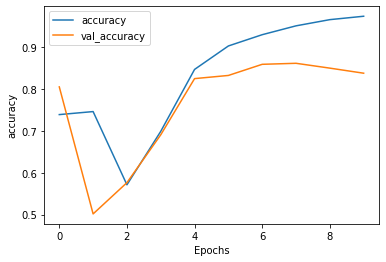

In [ ]:
plot_graphs(history, 'accuracy')

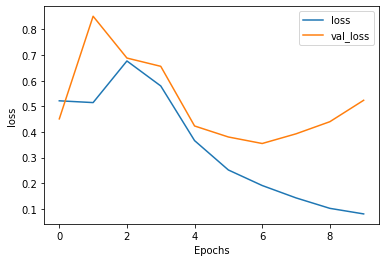

In [ ]:
plot_graphs(history, 'loss')

# Week 3 - IMDB Subwords 8K with Multi Layer LSTM

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

# The lines below throw an error.
#train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
#test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),

    # We can also stack LSTMs like any other keras layer by using code like this. 
    # But when we feed an LSTM into another one, we do have to put [return_sequences=True] into the first one. 
    # This ensures that the outputs of the LSTM match the desired inputs of the next one.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Train on 391 steps, validate on 391 steps
Epoch 1/10
391/391 [==============================] - ETA: 0s - batch: 195.0000 - size: 1.0000 - loss: 0.5685 - accuracy: 0.7023

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


391/391 [==============================] - 2231s 6s/step - batch: 195.0000 - size: 1.0000 - loss: 0.5685 - accuracy: 0.7023 - val_loss: 0.5697 - val_accuracy: 0.7608
Epoch 2/10
 53/391 [===>..........................] - ETA: 27:34 - batch: 26.0000 - size: 1.0000 - loss: 0.4812 - accuracy: 0.7777

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

# Week 3 - IMDB Subwords 8K with 1D Convolutional Layer

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

# Week 3 - IMDB Subwords 8K with Multiple Layer GRU

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

NameError: ignored

In [ ]:
tokenizer = info.features['text'].encoder

NameError: ignored

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

# Week 3 - Comparison

In [ ]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Week 3 - Sarcasm with Bidirectional LSTM

In [ ]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("test.h5")

# Week 3 - Sarcasm with 1D Convolutional Layer

In [ ]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.save("test.h5")

# Week 3 - Exercise 3, Exploring overfitting in NLP (Task)

In [ ]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=#Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion=.1

corpus = []


In [ ]:
# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

num_sentences = 0

with open("/tmp/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
      # Your Code here. Create list items where the first item is the text, found in row[5], and the second is the label. Note that the label is a '0' or a '4' in the text. When it's the former, make
      # your label to be 0, otherwise 1. Keep a count of the number of sentences in num_sentences
        list_item=[]
        # YOUR CODE HERE
        num_sentences = num_sentences + 1
        corpus.append(list_item)


--2019-06-07 17:53:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 2607:f8b0:4001:c1d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/tmp/training_cleaned.csv’

/tmp/training_clean 100%[===================>] 227.87M   221MB/s    in 1.0s    

2019-06-07 17:53:36 (221 MB/s) - ‘/tmp/training_cleaned.csv’ saved [238942690/238942690]



In [ ]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [ ]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(# YOUR CODE HERE)
    labels.append(# YOUR CODE HERE)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(# YOUR CODE HERE)

word_index = tokenizer.word_index
vocab_size=len(# YOUR CODE HERE)

sequences = tokenizer.texts_to_sequences(# YOUR CODE HERE)
padded = pad_sequences(# YOUR CODE HERE)

split = int(test_portion * training_size)

test_sequences = padded[# YOUR CODE HERE]
training_sequences = padded[# YOUR CODE HERE]
test_labels = labels[# YOUR CODE HERE]
training_labels = labels[# YOUR CODE HERE]

In [ ]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

138858
1


In [ ]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2019-06-07 17:55:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 2607:f8b0:4001:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   160MB/s    in 2.1s    

2019-06-07 17:55:33 (160 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [ ]:
print(len(embeddings_matrix))
# Expected Output
# 138859

138859


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    # YOUR CODE HERE - experiment with combining different types, such as convolutions and LSTMs
])
model.compile(# YOUR CODE HERE)
model.summary()

num_epochs = 50
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)

print("Training Complete")


In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!

# Week 3 - Exercise 3, Exploring overfitting in NLP (Solution)

In [ ]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
test_portion=.1

corpus = []


In [ ]:
# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

num_sentences = 0

with open("/tmp/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        list_item=[]
        list_item.append(row[5])
        this_label=row[0]
        if this_label=='0':
            list_item.append(0)
        else:
            list_item.append(1)
        num_sentences = num_sentences + 1
        corpus.append(list_item)


--2019-06-07 17:53:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 2607:f8b0:4001:c1d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/tmp/training_cleaned.csv’

/tmp/training_clean 100%[===================>] 227.87M   221MB/s    in 1.0s    

2019-06-07 17:53:36 (221 MB/s) - ‘/tmp/training_cleaned.csv’ saved [238942690/238942690]



In [ ]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [ ]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [ ]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

138858
1


In [ ]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2019-06-07 17:55:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.183.128, 2607:f8b0:4001:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.183.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   160MB/s    in 2.1s    

2019-06-07 17:55:33 (160 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [ ]:
print(len(embeddings_matrix))
# Expected Output
# 138859

138859


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50

training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

print("Training Complete")

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!

# Week 4 - Basic Data for a Single Song and Traditional Irish Music

In [ ]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
tokenizer = Tokenizer()

# a string containing a single song
data = """In the town of Athy one Jeremy Lanigan \n
        Battered away til he hadnt a pound. \n
        His father died and made him a man again \n
        Left him a farm and ten acres of ground. \n
        He gave a grand party for friends and relations \n
        Who didnt forget him when come to the wall, \n
        And if youll but listen Ill make your eyes glisten \n
        Of the rows and the ructions of Lanigans Ball. \n
        Myself to be sure got free invitation, \n
        For all the nice girls and boys I might ask, \n
        And just in a minute both friends and relations \n
        Were dancing round merry as bees round a cask. \n
        Judy ODaly, that nice little milliner, \n
        She tipped me a wink for to give her a call, \n
        And I soon arrived with Peggy McGilligan \n
        Just in time for Lanigans Ball. \n
        There were lashings of punch and wine for the ladies, \n
        Potatoes and cakes; there was bacon and tea, \n
        There were the Nolans, Dolans, OGradys \n
        Courting the girls and dancing away. \n
        Songs they went round as plenty as water, \n
        The harp that once sounded in Taras old hall,\n
        Sweet Nelly Gray and The Rat Catchers Daughter,\n
        All singing together at Lanigans Ball. \n
        They were doing all kinds of nonsensical polkas \n
        All round the room in a whirligig. \n
        Julia and I, we banished their nonsense \n
        And tipped them the twist of a reel and a jig. \n
        Ach mavrone, how the girls got all mad at me \n
        Danced til youd think the ceiling would fall. \n
        For I spent three weeks at Brooks Academy \n
        Learning new steps for Lanigans Ball. \n
        Three long weeks I spent up in Dublin, \n
        Three long weeks to learn nothing at all,\n 
        Three long weeks I spent up in Dublin, \n
        Learning new steps for Lanigans Ball. \n
        She stepped out and I stepped in again, \n
        I stepped out and she stepped in again, \n
        She stepped out and I stepped in again, \n
        Learning new steps for Lanigans Ball. \n
        Boys were all merry and the girls they were hearty \n
        And danced all around in couples and groups, \n
        Til an accident happened, young Terrance McCarthy \n
        Put his right leg through miss Finnertys hoops. \n
        Poor creature fainted and cried Meelia murther, \n
        Called for her brothers and gathered them all. \n
        Carmody swore that hed go no further \n
        Til he had satisfaction at Lanigans Ball. \n
        In the midst of the row miss Kerrigan fainted, \n
        Her cheeks at the same time as red as a rose. \n
        Some of the lads declared she was painted, \n
        She took a small drop too much, I suppose. \n
        Her sweetheart, Ned Morgan, so powerful and able, \n
        When he saw his fair colleen stretched out by the wall, \n
        Tore the left leg from under the table \n
        And smashed all the Chaneys at Lanigans Ball. \n
        Boys, oh boys, twas then there were runctions. \n
        Myself got a lick from big Phelim McHugh. \n
        I soon replied to his introduction \n
        And kicked up a terrible hullabaloo. \n
        Old Casey, the piper, was near being strangled. \n
        They squeezed up his pipes, bellows, chanters and all. \n
        The girls, in their ribbons, they got all entangled \n
        And that put an end to Lanigans Ball."""

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words) # total number of unique words

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# sentence => [0 0 0 0 4 2 66 8 67 68 69 70]
# X => [0 0 0 0 4 2 66 8 67 68 69]
# Label =>  [70]
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [ ]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [ ]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
model = Sequential()

# 64 => is the number of dimensions to use to plot the vector for a word
# Feel free to tweak this to see what its impact would be on results.
# input_length => the size of the input dimensions will be fed in, 
# and this is the length of the longest sequence minus 1. We subtract 
# one because we cropped off the last word of each sequence to get the label, 
# so our sequences will be one less than the maximum sequence length.
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))

# LSTM => their cell state means that they carry context along with them, 
# so it's not just next door neighbor words that have an impact. LSTM only 
# carries the context forward. If we change the code to be bidirectional
# and then retraining, we can see that we do converge a bit quicker.
#model.add(LSTM(20))
model.add(Bidirectional(LSTM(20)))

# Dense Layer => sized as the total words, which is the same size that we used 
# for the one-hot encoding. Thus this layer will have one neuron, per word and 
# that neuron should light up when we predict a given word.
model.add(Dense(total_words, activation='softmax'))

# categorical_crossentropy => because we're doing a categorical classification
# adam optimizer => eems to work particularly well for tasks like this one
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# epochs=500 => we'll train for a lot of epoch as it takes a while for a model 
# like this to converge, particularly as it has very little data
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 1s 5ms/step - loss: 5.5710 - accuracy: 0.0022
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 5.5562 - accuracy: 0.0535
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 5.5290 - accuracy: 0.0708
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 5.4416 - accuracy: 0.0162
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 5.2740 - accuracy: 0.0359
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 5.1953 - accuracy: 0.0242
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0929 - accuracy: 0.0362
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0529 - accuracy: 0.0431
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0109 - accuracy: 0.0671
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0140 - accuracy: 0.0582
Epoch 11/

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

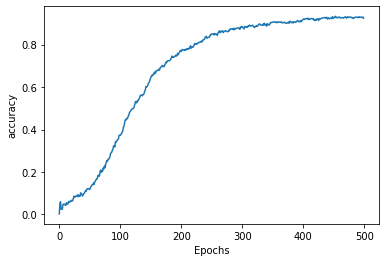

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "Laurence went to dublin"
next_words = 100 # predict next 100 words
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin i we banished their nonsense ask ask rose rose rose rose together lanigans ball relations me me all nonsense water water water a cask cask man again accident dolans dolans ogradys rose ogradys ogradys ogradys together punch punch lanigans ball learn nothing nonsense nonsense nonsense water water water a jig rose call rose red he pound rose mavrone together might meelia meelia meelia might might by by ball brooks academy murther academy ask swore academy academy swore table swore ladies nice table table table youll dolans dolans dolans dolans make your big stepped weeks eyes eyes eyes eyes new red


* We looked at the data, a string containing a single song, and saw how to prepare that for generating new text. 
* We saw how to tokenize the data and then create sub-sentence n-grams that were labelled with the next word in the sentence.
* We then one-hot encoded the labels to get us into a position where we can build a neural network that can, given a sentence, predict the next word. 

We can see what's actually happening here is that, in the beginning, it kind of looks pretty good. It's beginning to make sense. But of course because our body of texts is pretty small and each prediction is a probability, as you get further and further the probability of the next probable word is decreasing and the quality of the prediction as a result goes down.

# Week 4 - Poet Data

In [ ]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

# In a co-lab with this data and these parameters, using a GPU, it typically takes about 20 minutes to train a model. 
# Once it's done, try a a seed sentence and get it to give you 100 words. Note that there are no line breaks in the 
# prediction, so you'll have to add them manually to turn the word stream into poetry. 

In [ ]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

In [ ]:
print(xs[6])

In [ ]:
print(ys[6])

In [ ]:
print(xs[5])
print(ys[5])

In [ ]:
print(tokenizer.word_index)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

This approach works very well until you have very large bodies of text with many many words. So for example, you could try the complete works of Shakespeare and you'll likely hit memory errors, as assigning the one-hot encodings of the labels to matrices that have over 31,477 elements, which is the number of unique words in the collection, and there are over 15 million sequences generated using the algorithm that we showed here. So the labels alone would require the storage of many terabytes of RAM. So for your next task, you'll go through a workbook by yourself that uses character-based prediction. The full number of unique characters in a corpus is far less than the full number of unique words, at least in English. So the same principles that you use to predict words can be used to apply here. The workbook is at [this URL](https://www.tensorflow.org/tutorials/text/text_generation), so try it out, and once you've done, that you'll be ready for this week's final exercise.

# Week 4 - Using LSTMs, see if you can write Shakespeare! (Task)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(# Your Embedding Layer)
model.add(# An LSTM Layer)
model.add(# A dropout layer)
model.add(# Another LSTM Layer)
model.add(# A Dense Layer including regularizers)
model.add(# A Dense Layer)
# Pick an optimizer
model.compile(# Pick a loss function and an optimizer)
print(model.summary())


In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

# Week 4 - Using LSTMs, see if you can write Shakespeare! (Solution)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)